Imports

In [2]:
from IPython.display import Markdown as md, display
import pandas as pd
from matplotlib import MatplotlibDeprecationWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning, HessianInversionWarning
from RhythmCount import data_processing as dproc
from RhythmCount import plot

import warnings

# ignore these warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=HessianInversionWarning)
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

# Cleaning and analysing raw data

Southern Ring Road of Ljubljana  Var:  3374499.8176657874  Mean:  3057.687174541948


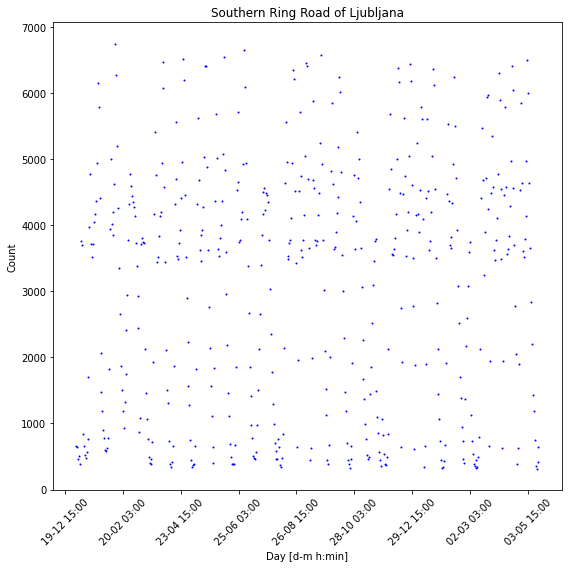

In [3]:
df = pd.read_csv(r'..\data\supp_file_0.csv')
df = dproc.clean_data(df)
plot.plot_raw_data(df, "Southern Ring Road of Ljubljana", 1500)

# Building models

In [4]:
models_type = ['poisson', 'zero_poisson', 'gen_poisson', 'nb', 'zero_nb']
n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

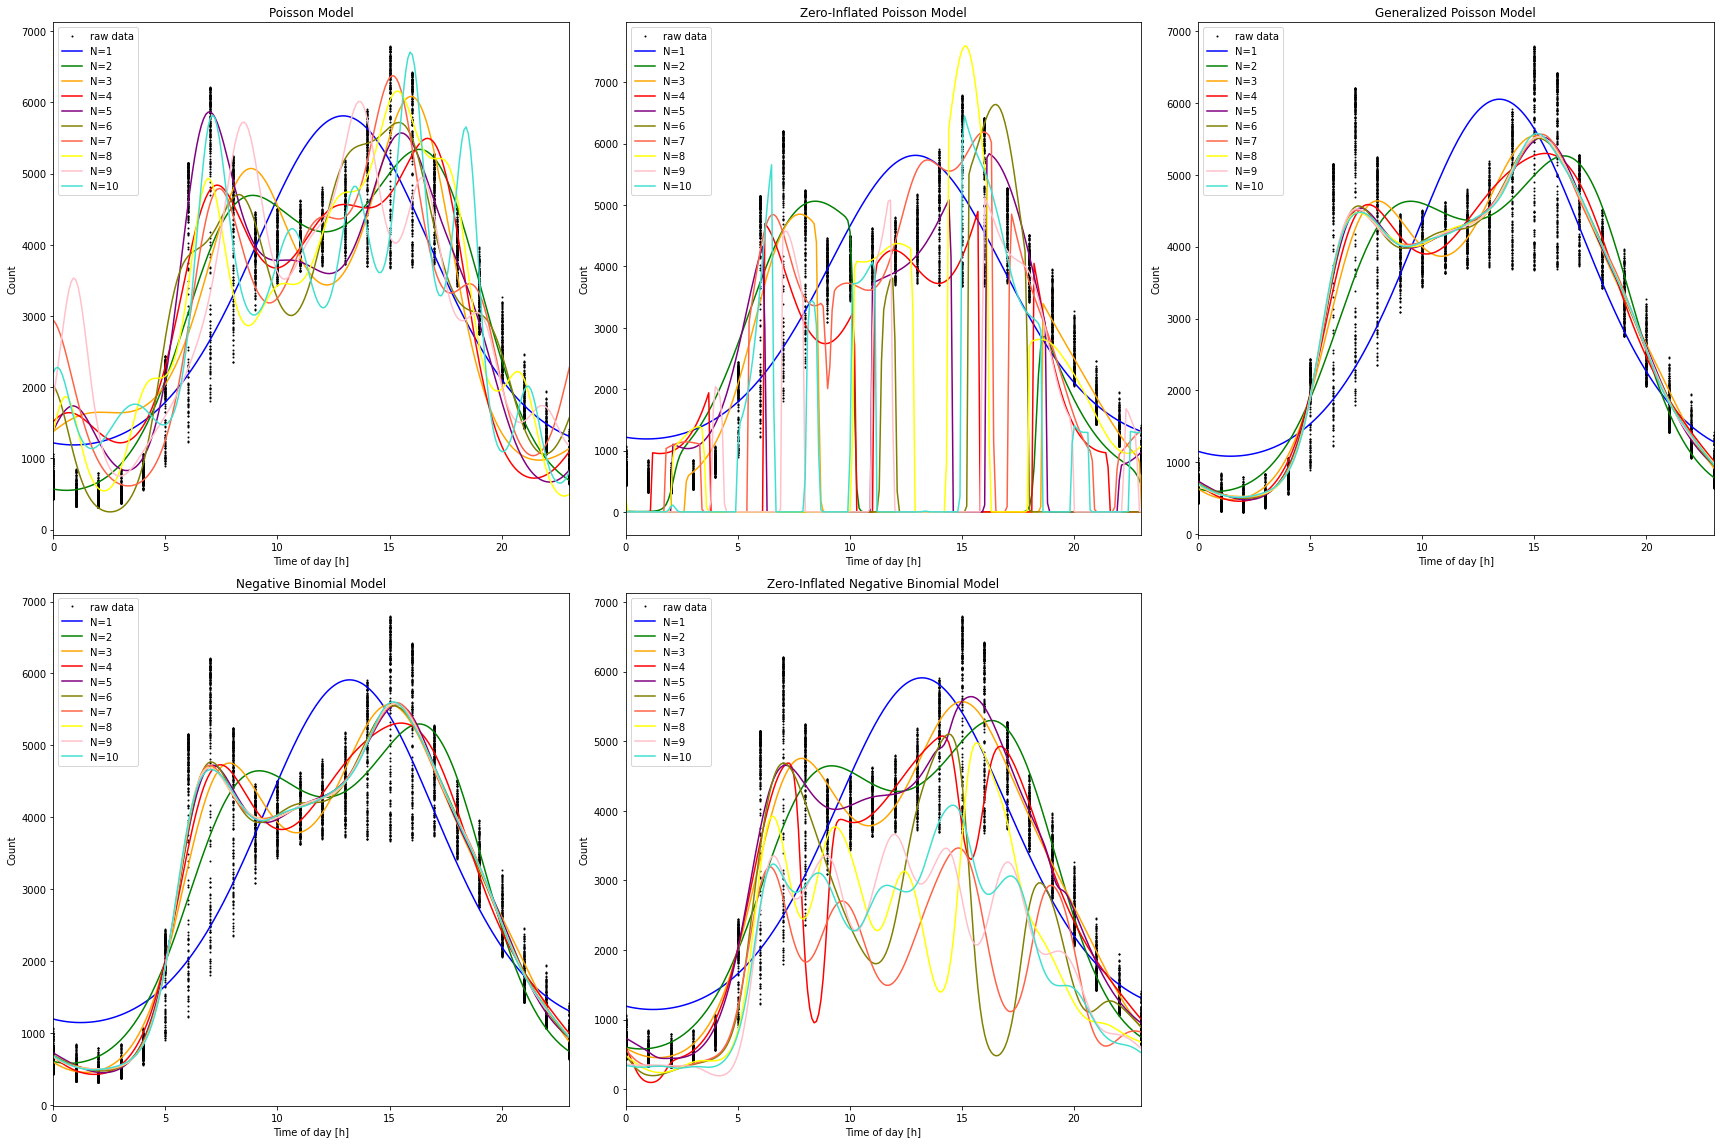

,AIC,BIC,RSS,X_test,Y(est),Y_test,amplitude,heights,log_likelihood,logs,mean(est),mesor,model_type,n_components,p,peaks
0,2.203995e+06,2.204014e+06,6.362619e+09,"[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1188.8347200697049, 1226.1294089421456, 1332....","[1216.6987367192212, 1210.9481858920794, 1205....",2310.54,[5809.77],-1.101994e+06,"[-144.59713541494375, -173.53495101465296, -39...",3057.620620,3499.23,poisson,1.0,1.110223e-16,[12.91]
1,9.105555e+05,9.105882e+05,2.812110e+09,"[0.0, 0.1001001001001001, 0.2002002002002002, ...","[559.8745958094647, 663.7387179096863, 914.808...","[568.8963152647717, 563.0849741079613, 558.397...",2394.40,"[4693.3, 5339.37]",-4.552727e+05,"[-12.627608722124478, -4.544606543997361, -145...",3057.730368,2944.97,poisson,2.0,1.110223e-16,"[8.91, 16.32]"
2,2.272227e+06,2.272272e+06,5.190179e+09,"[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1580.213255109423, 1647.1666573262619, 1640.6...","[1377.5429301410456, 1402.131816999017, 1426.1...",2553.28,"[5071.47, 6081.89]",-1.136106e+06,"[-348.1487725253346, -405.35268594016316, -604...",3056.904524,3528.61,poisson,3.0,1.110223e-16,"[8.81, 15.92]"
3,1.958392e+06,1.958451e+06,3.874357e+09,"[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1621.246538080126, 1373.1143791723846, 1218.5...","[1517.7994663845968, 1549.641989537944, 1577.2...",2385.74,"[4837.53, 4566.0, 5493.78]",-9.791869e+05,"[-372.2626177166003, -247.94651429017858, -318...",3055.653337,3108.04,poisson,4.0,1.110223e-16,"[7.31, 13.01, 16.72]"
4,1.495688e+06,1.495760e+06,3.321464e+09,"[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1728.3966796072427, 1254.1624815321545, 850.2...","[1392.02698751538, 1455.5108259559304, 1515.81...",2598.22,"[5864.1, 5570.54]",-7.478329e+05,"[-437.1734966692384, -187.0778220263196, -114....",3059.662989,3265.88,poisson,5.0,1.110223e-16,"[7.01, 15.52]"
5,1.249147e+06,1.249232e+06,3.267573e+09,"[0.0, 0.1001001001001001, 0.2002002002002002, ...","[950.0830891269605, 307.9352825356589, 292.319...","[2023.860450655596, 1972.6109967687783, 1899.4...",2734.34,"[4704.69, 5717.07]",-6.245606e+05,"[-53.80393256793286, -141.0284889246318, -43.0...",3056.654954,2982.73,poisson,6.0,1.110223e-16,"[8.31, 15.42]"
6,2.124078e+06,2.124176e+06,4.932691e+09,"[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1912.7391542641271, 966.8474566179855, 634.01...","[2939.4026996191983, 2896.4976296860627, 2832....",2880.35,"[4789.94, 6374.17]",-1.062024e+06,"[-554.630170220672, -66.53981133647312, -31.70...",3060.065124,3493.82,poisson,7.0,1.110223e-16,"[7.41, 15.12]"
7,1.505147e+06,1.505258e+06,3.640825e+09,"[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1521.6869377520825, 580.4789726589372, 849.28...","[1373.0554927651867, 1512.0730219562884, 1639....",2842.97,"[4931.03, 6156.8, 5211.45]",-7.525565e+05,"[-314.5310284812431, -7.201294524106288, -113....",3059.369994,3313.83,poisson,8.0,1.110223e-16,"[6.91, 15.32, 17.22]"
8,2.709145e+06,2.709269e+06,7.312447e+09,"[0.0, 0.1001001001001001, 0.2002002002002002, ...","[3507.939122113199, 1415.4162953069479, 750.60...","[1863.2984541281621, 2062.970536334271, 2284.2...",2630.43,"[5723.12, 6011.55, 4942.92]",-1.354553e+06,"[-1749.5451583849672, -270.79904169063275, -71...",3113.894933,3381.12,poisson,9.0,1.110223e-16,"[8.51, 13.61, 16.42]"
9,2.471741e+06,2.471879e+06,6.044707e+09,"[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1475.8734489462518, 1179.8398694540285, 1619....","[2206.9183696878517, 2265.5764469419105, 2277....",3026.52,"[5819.24, 6704.67, 5654.44]",-1.235849e+06,"[-288.8934516628183, -151.9134377875357, -589....",3010.262505,3678.16,poisson,10.0,1.110223e-16,"[7.11, 15.92, 18.42]"


In [5]:
df_results = dproc.fit_to_models(df, models_type, n_components)
df_results.to_csv(r'results\results.csv')
display(df_results)

# Comparing fitted models
## First compare by model type

In [6]:
best_model_type = dproc.get_best_model_type(df_results, 'Vuong')
print("Best model: {}".format(best_model_type.model_type))
best_model = dproc.get_best_n_components(df_results, 'Vuong', model_type=best_model_type['model_type'])
print("Number of components: {}".format(best_model.n_components))

Best model: gen_poisson
Number of components: 9.0


## First compare by number of components

In [7]:
best_n_components = dproc.get_best_n_components(df_results, 'Vuong')
print("Number of components: {}".format(best_n_components.n_components))
best_model = dproc.get_best_model_type(df_results, 'Vuong', n_components=best_n_components['n_components'])
print("Best model: {}".format(best_model.model_type))

Number of components: 7.0
Best model: gen_poisson


We will use the result from the second comparison as the best model.

In [8]:
model_type = best_model.model_type
n_component = int(best_model.n_components)
print("Best model: {}  Number of components: {}".format(best_model.model_type,best_model.n_components))

Best model: gen_poisson  Number of components: 7.0


# Plot model and CIs

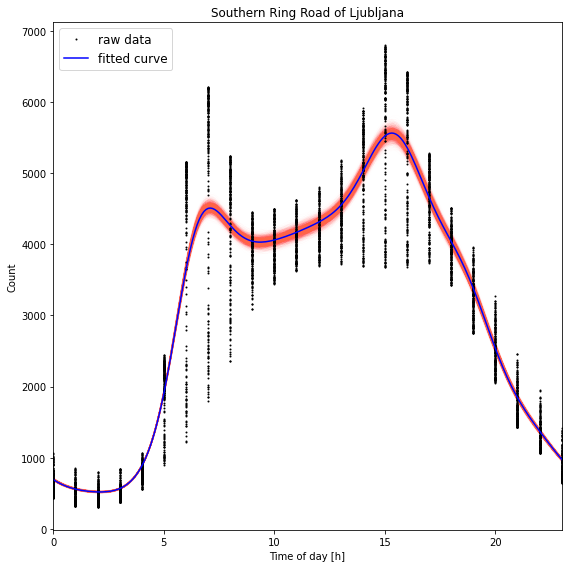

Confidence intervals of model:


,0,1
0,7.770621,7.778493
1,-0.308355,-0.294848
2,-0.988630,-0.974330
3,-0.235094,-0.224247
4,-0.379342,-0.363038
5,-0.187102,-0.173941
6,0.076749,0.088573
7,0.002272,0.017384
8,0.072967,0.087030
9,0.050410,0.065653


In [9]:
CIs=plot.plot_model(df, model_type, n_component, title='Southern Ring Road of Ljubljana')
print('Confidence intervals of model:')
display(CIs)

# Plot only CIs

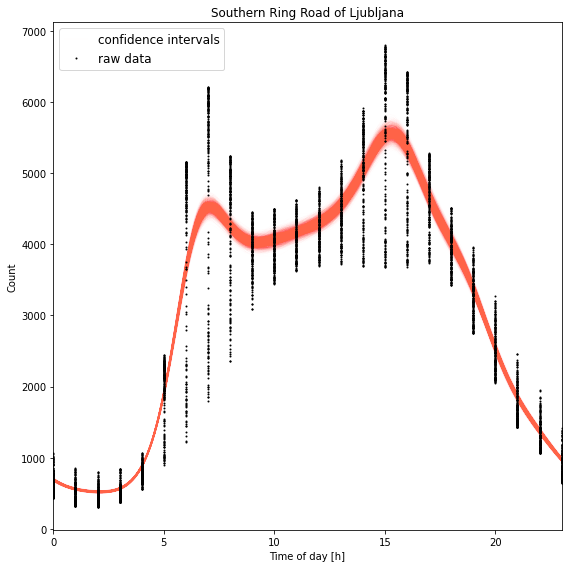

In [10]:
CIs=plot.plot_confidence_intervals(df, model_type, n_component, title='Southern Ring Road of Ljubljana')
CIs.to_csv(r'results\CI.csv')

# Calculate CIs of rhythm parameters

In [11]:
CIs_params=dproc.calculate_confidence_intervals_parameters(df, n_component, model_type,best_model['peaks'])
best_model = best_model.append(pd.Series(CIs_params))
best_model=best_model[['model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs']]
best_model.to_frame().to_csv(r'results\CI_rhythm.csv')
print('Rhythm parameters and its confidence intervals:')
display(best_model.to_frame())

Rhythm parameters and its confidence intervals:


,0
model_type,gen_poisson
n_components,7
amplitude,2522.63
mesor,3041.3
peaks,"[7.11, 15.32]"
heights,"[4509.59, 5563.93]"
amplitude_CIs,"[2480.47, 2560.28]"
mesor_CIs,"[3000.26, 3078.53]"
peaks_CIs,"[[7.02, 7.21], [15.19, 15.43]]"
heights_CIs,"[[4409.93, 4627.13], [5481.37, 5638.17]]"


# Compare by one component - effect of COVID-19
Datasets have been pre-cleaned, we removed outliers using function clean_data() from data_processing module.
Function compare_by_component() builds and evaluates models for each case separately. Next, it calculates CIs of model and rhythm parameters.
## All days

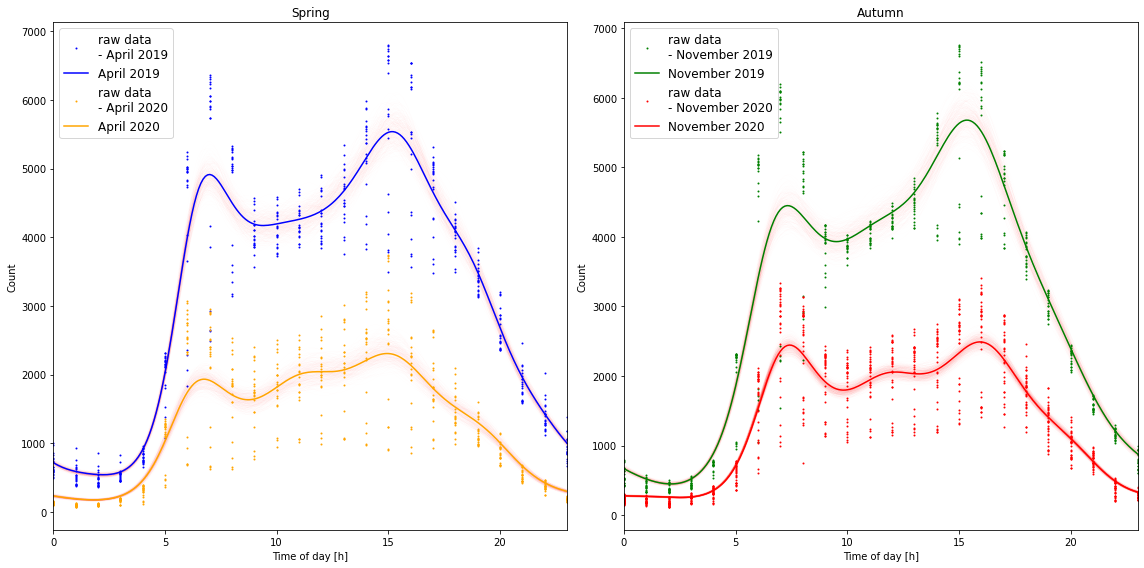

,time_period,model_type,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs,AIC,BIC,log_likelihood,p
0,April 2019,gen_poisson,7.0,2498.82,3040.38,"[7.01, 15.22]","[4915.05, 5539.2]","[2384.96, 2633.13]","[2921.41, 3170.27]","[[6.71, 7.3], [14.86, 15.57]]","[[4521.15, 5283.0], [5308.81, 5800.96]]",7642.861869,7710.423089,-3805.430934,1.110223e-16
1,November 2019,gen_poisson,5.0,2616.01,3063.86,"[7.31, 15.32]","[4450.6, 5679.88]","[2500.21, 2753.37]","[2959.94, 3210.82]","[[7.09, 7.71], [15.16, 15.57]]","[[4257.47, 4675.81], [5461.16, 5963.18]]",7749.033291,7799.704207,-3862.516646,1.110223e-16
2,April 2020,gen_poisson,5.0,1065.90,1241.10,"[6.71, 11.91, 14.91]","[1933.02, 2042.0, 2307.0]","[986.88, 1177.11]","[1168.92, 1338.77]","[[6.55, 6.98], [10.95, 12.02], [14.33, 15.48]]","[[1703.3, 2220.23], [1932.34, 2167.57], [2137....",7302.537247,7353.231948,-3639.268623,1.110223e-16
3,November 2020,gen_poisson,5.0,1118.82,1371.95,"[7.41, 12.21, 15.92]","[2445.32, 2057.38, 2490.77]","[1063.59, 1195.77]","[1314.95, 1450.68]","[[7.29, 7.59], [11.64, 12.68], [15.73, 16.15]]","[[2265.88, 2633.63], [1993.53, 2139.28], [2339...",11679.045226,11735.716784,-5827.522613,1.110223e-16


In [16]:
df_covid = pd.read_csv(r'..\data\supp_file_1.csv')
df_results = dproc.compare_by_component(df_covid, 'time_period', n_components, models_type, ax_indices=[0, 1, 0, 1],
                           ax_titles=['Spring', 'Autumn'], rows=1, cols=2,save_file_to='figure1.pdf')
df_results=df_results[['time_period','model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs','AIC','BIC','log_likelihood','p']]
df_results.to_csv(r'results\covid.csv', index=False)
display(df_results)

## Only workdays

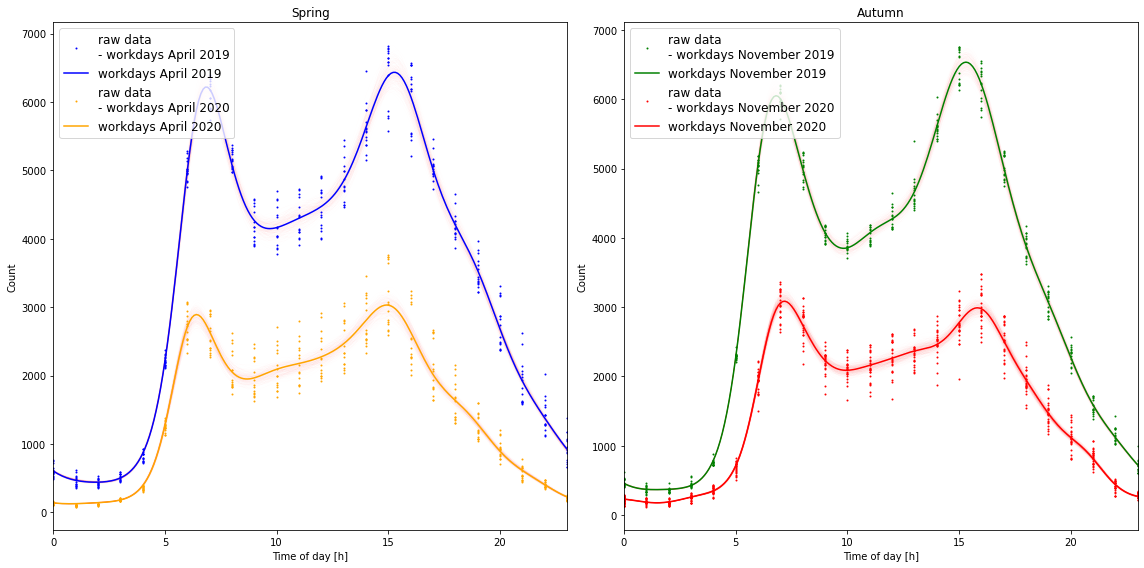

,time_period,model_type,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs,AIC,BIC,log_likelihood,p
0,workdays April 2019,gen_poisson,7.0,2995.54,3437.10,"[6.81, 15.32]","[6217.27, 6432.65]","[2922.51, 3056.45]","[3370.82, 3498.84]","[[6.76, 6.95], [15.11, 15.38]]","[[6154.72, 6273.39], [6293.98, 6554.65]]",4905.742263,4967.919928,-2436.871132,1.110223e-16
1,workdays November 2019,gen_poisson,8.0,3084.91,3451.80,"[6.81, 15.32]","[6052.79, 6536.7]","[3050.62, 3127.64]","[3417.58, 3491.7]","[[6.81, 6.81], [15.21, 15.4]]","[[6008.2, 6085.25], [6469.14, 6618.39]]",4540.895793,4610.995044,-2252.447896,1.110223e-16
2,workdays April 2020,gen_poisson,7.0,1452.39,1579.27,"[6.41, 14.91]","[2892.09, 3031.66]","[1393.33, 1513.12]","[1519.51, 1637.2]","[[6.37, 6.46], [14.73, 15.18]]","[[2815.16, 2975.66], [2907.26, 3153.44]]",4713.124515,4775.302180,-2340.562258,1.110223e-16
3,workdays November 2020,gen_poisson,9.0,1454.55,1631.44,"[7.21, 15.82]","[3085.99, 2991.33]","[1420.62, 1492.91]","[1598.91, 1669.35]","[[7.04, 7.26], [15.65, 15.97]]","[[3020.09, 3161.7], [2931.54, 3054.91]]",7763.994124,7852.523893,-3861.997062,1.110223e-16


In [17]:
df_covid = pd.read_csv(r'..\data\supp_file_2.csv')
df_results = dproc.compare_by_component(df_covid, 'time_period', n_components, models_type, ax_indices=[0, 1, 0, 1],
                           ax_titles=['Spring', 'Autumn'], rows=1, cols=2,save_file_to='figure2.pdf')
df_results=df_results[['time_period','model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs','AIC','BIC','log_likelihood','p']]
df_results.to_csv(r'results\covid_workdays.csv', index=False)
display(df_results)

## Only weekends

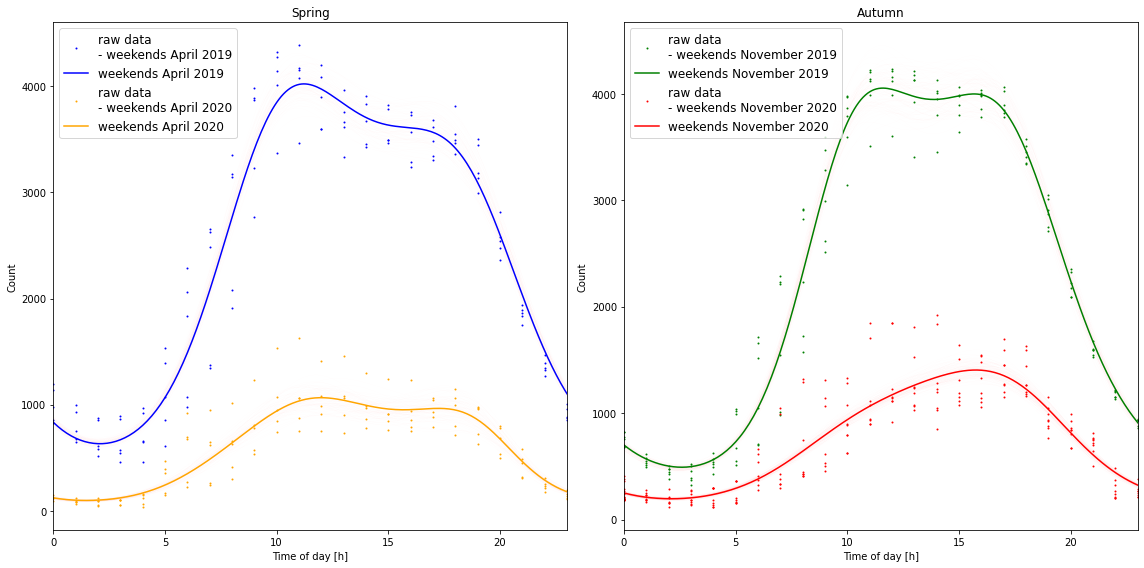

,time_period,model_type,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs,AIC,BIC,log_likelihood,p
0,weekends April 2019,gen_poisson,2.0,1694.28,2326.76,[11.21],[4021.03],"[1641.68, 1785.2]","[2278.19, 2408.96]","[10.85, 11.49]","[3926.3, 4187.73]",1736.519665,1753.244616,-862.259833,1.110223e-16
1,weekends November 2019,gen_poisson,3.0,1781.03,2272.28,"[11.61, 15.72]","[4053.3, 3998.37]","[1741.4, 1823.18]","[2227.92, 2309.6]","[[11.32, 11.85], [15.19, 16.13]]","[[3956.99, 4130.01], [3926.99, 4067.35]]",2008.534228,2032.292735,-996.267114,1.110223e-16
2,weekends April 2020,gen_poisson,3.0,483.76,582.08,"[12.01, 17.22]","[1065.84, 965.17]","[452.25, 536.24]","[542.87, 641.1]","[[11.33, 12.56], [16.72, 17.9]]","[[996.05, 1176.41], [912.35, 1013.65]]",1537.066999,1559.366932,-760.533499,1.110223e-16
3,weekends November 2020,gen_poisson,2.0,604.73,799.73,[15.72],[1404.46],"[583.21, 625.05]","[775.56, 819.98]","[15.46, 16.06]","[1360.35, 1443.46]",2603.998018,2623.757847,-1295.999009,1.110223e-16


In [18]:
df_covid = pd.read_csv(r'..\data\supp_file_3.csv')
df_results = dproc.compare_by_component(df_covid, 'time_period', n_components, models_type, ax_indices=[0, 1, 0, 1],
                           ax_titles=['Spring', 'Autumn'], rows=1, cols=2,save_file_to='figure3.pdf')
df_results=df_results[['time_period','model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs','AIC','BIC','log_likelihood','p']]
df_results.to_csv(r'results\covid_weekdays.csv', index=False)
display(df_results)